In [ ]:
import numpy as np
import math
from scipy.stats import uniform as uniform_der
from scipy.stats import norm as gauss_der
import matplotlib.pyplot as plt
import random
from scipy.stats import entropy
import collections
import seaborn as sns
import scipy.stats as ss

In [ ]:
N = 12
a = 0
b = N
mu = N - 12
sigma_square = 24 / N**2

length_low = 10
length_up = 1000
step = 10
sample_num = 1000

In [ ]:
uniform_entropy = np.log2(b - a)
# gauss_entropy = np.log2(math.sqrt(2 * sigma_square * math.pi * math.e))
gauss_entropy = (1/2)*np.log(2*math.pi*(sigma_square)) + 1/2
print(uniform_entropy)
print(gauss_entropy)

In [ ]:
def estimate_shannon_entropy(dna_sequence):
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
    dist = [x / sum(bases.values()) for x in bases.values()]
    return entropy(dist, base=2)

## Исследуются распределения: равномерное и нормальное

### Используем встроенные функции

In [ ]:
inbuild_uniform = []
inbuild_gauss = []
entr_deviation_uniform  = []
entr_deviation_gauss  = []

for length in range(length_low, length_up + 1, step): 
    print(f'length: {length}')
    for _ in range(sample_num):
        uniform = np.random.uniform(low=a, high=b, size=length)
        gauss = np.random.normal(loc=mu, scale=math.sqrt(sigma_square), size=length)
        
        entr_deviation_uniform.append(uniform_entropy - estimate_shannon_entropy(uniform))
        entr_deviation_gauss.append(gauss_entropy - estimate_shannon_entropy(gauss))

    inbuild_uniform.append(np.var(entr_deviation_uniform))
    inbuild_gauss.append(np.var(entr_deviation_gauss))

In [ ]:
plt.figure(figsize = (24, 14))

plt.subplot(1,2,1)
# plt.plot(range(10, 1001, 10), inbuild_uniform)
ax = sns.scatterplot(x=range(10, 1001, 10), y=inbuild_uniform)
plt.title('Uniform distribution')
plt.grid()

plt.subplot(1,2,2)
# plt.plot(range(10, 1001, 10), inbuild_gauss)
ax = sns.scatterplot(x=range(10, 1001, 10), y=inbuild_gauss)
plt.title('Gauss distribution')
plt.grid()

### Исследуем генерацию через базовую св

In [ ]:
def uniform_sample(a_gen, b_gen, length_gen):
    return (b_gen - a_gen) * np.random.random_sample(size=length_gen) + a_gen

In [ ]:
# box-muller transformations
def gauss_sample(mu, sigma, length_gen):
    source = np.random.random_sample(size=length_gen)
    U1 = source[0 : len(source) // 2]
    U2 = source[len(source) // 2 : len(source)]
    logU1 = np.log(U1)
    logU1 = np.where(logU1 == np.NINF, 0, logU1)
    Z0 = np.sqrt(-2 * logU1) * np.cos(2 * math.pi * U2)
    Z1 = np.sqrt(-2 * logU1) * np.sin(2 * math.pi * U2)
    Z = np.concatenate((Z0, Z1))
    Z = Z * sigma + mu
    return Z

In [ ]:
brv_uniform = []
brv_gauss = []
entr_deviation_uniform  = []
entr_deviation_gauss  = []

# variances = np.array([])
# for l in length:
#     entropies = np.array([])
#     for i in range(1000):
#         norm_sample = np.random.normal(mu, sigma, l)
#         entr = entropy(get_frequencies(norm_sample))
#         entropies = np.append(entropies, entr)
#     variance = np.var(abs(entropies - normal_entropy), ddof=1)
#     variances = np.append(variances, variance)
#     print(variances)

for length in range(length_low, length_up + 1, step):
    entr_deviation_uniform  = []
    entr_deviation_gauss  = []
    print(f'length: {length}')
    for _ in range(sample_num):
        uni = uniform_sample(a, b, length)
        gauss = gauss_sample(mu, math.sqrt(sigma_square), length)

        entr_deviation_uniform.append(abs(uniform_entropy - estimate_shannon_entropy(uni)))
        entr_deviation_gauss.append(abs(gauss_entropy - estimate_shannon_entropy(gauss)))

    brv_uniform.append(np.var(entr_deviation_uniform))
    brv_gauss.append(np.var(entr_deviation_gauss))

In [ ]:
plt.figure(figsize = (24, 14))

# plt.subplot(1,2,1)
# plt.plot(range(10, 1001, 10), brv_uniform)
# plt.title('Uniform distribution')
# plt.grid()

# plt.subplot(1,2,2)
# plt.plot(range(10, 1001, 10), brv_gauss)
# plt.title('Gauss distribution')
# plt.grid()

plt.subplot(1,2,1)
# plt.plot(range(10, 1001, 10), inbuild_uniform)
ax = sns.scatterplot(x=range(10, 1001, 10), y=brv_uniform)
plt.title('Uniform distribution')
plt.grid()

plt.subplot(1,2,2)
# plt.plot(range(10, 1001, 10), inbuild_gauss)
ax = sns.scatterplot(x=range(10, 1001, 10), y=brv_gauss)
plt.title('Gauss distribution')
plt.grid()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numba import jit
import math
from scipy.special import comb
import scipy.stats as ss

In [2]:
N = 12
length = [i for i in range(10, 1001, 10)]
a = 0
b = 12
mu = N - 12
sigma = 5 / N

In [10]:
uniform_entropy = np.log(b - a)
normal_entropy = (1/2)*np.log(2*math.pi*(sigma**2)) + 1/2

In [11]:
uniform_entropy

2.4849066497880004

In [12]:
normal_entropy

0.5434697958507728

In [18]:
def entropy(freqs):
    logs = np.log(freqs)
    logs = np.where(logs==np.NINF, 0, logs)
    return -sum(freqs*logs)


def get_frequencies(data):
    n = len(data)
    res = ss.relfreq(data, numbins=int(np.log2(n))+1)
    return res.frequency 

C:\Users\aowl2\AppData\Local\Temp/ipykernel_31608/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


[0.01031297]
[0.01031297 0.00441321]
[0.01031297 0.00441321 0.00285018]
[0.01031297 0.00441321 0.00285018 0.00198639]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691 ]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371 ]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377 0.00065439]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377 0.00065439 0.00056583]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377 

[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377 0.00065439 0.00056583
 0.00052099 0.00052415 0.00045775 0.00042244 0.00037036 0.00037571
 0.00034393 0.00031721 0.00030994 0.00028479 0.0002892  0.00024972
 0.00026653 0.00022649 0.00022974 0.00020049 0.00021079 0.00020917
 0.00018916 0.00017368 0.00016493 0.00016246 0.00016093 0.00015406
 0.00015341 0.00014274 0.0001391 ]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377 0.00065439 0.00056583
 0.00052099 0.00052415 0.00045775 0.00042244 0.00037036 0.00037571
 0.00034393 0.00031721 0.00030994 0.00028479 0.0002892  0.00024972
 0.00026653 0.00022649 0.00022974 0.00020049 0.00021079 0.00020917
 0.00018916 0.00017368 0.00016493 0.00016246 0.00016093 0.00015406
 0.00015341 0.00014274 0.0001391  0.00014074]
[0.01031297 0.00441321 0.00285018 0.00198639 0.00159871 0.00144583
 0.0011691  0.00096307 0.0008371  0.00072377 0.0

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05]
[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05 9.01350322e-05
 8.80654899e-05 8.76045714e-05 8.95449991e-05 9.42426886e-05
 8.19563345e-05 8.21154975e-05 7.83140969e-05 8.03668130e-05
 7.45740760e-05]
[1.0312

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05 9.01350322e-05
 8.80654899e-05 8.76045714e-05 8.95449991e-05 9.42426886e-05
 8.19563345e-05 8.21154975e-05 7.83140969e-05 8.03668130e-05
 7.45740760e-05 7.739940

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05 9.01350322e-05
 8.80654899e-05 8.76045714e-05 8.95449991e-05 9.42426886e-05
 8.19563345e-05 8.21154975e-05 7.83140969e-05 8.03668130e-05
 7.45740760e-05 7.739940

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05 9.01350322e-05
 8.80654899e-05 8.76045714e-05 8.95449991e-05 9.42426886e-05
 8.19563345e-05 8.21154975e-05 7.83140969e-05 8.03668130e-05
 7.45740760e-05 7.739940

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05 9.01350322e-05
 8.80654899e-05 8.76045714e-05 8.95449991e-05 9.42426886e-05
 8.19563345e-05 8.21154975e-05 7.83140969e-05 8.03668130e-05
 7.45740760e-05 7.739940

[1.03129725e-02 4.41320773e-03 2.85017897e-03 1.98639365e-03
 1.59870905e-03 1.44582774e-03 1.16910395e-03 9.63067183e-04
 8.37103679e-04 7.23769523e-04 6.54389081e-04 5.65826722e-04
 5.20987682e-04 5.24146544e-04 4.57751217e-04 4.22442039e-04
 3.70356458e-04 3.75712338e-04 3.43931988e-04 3.17207300e-04
 3.09939394e-04 2.84791478e-04 2.89197435e-04 2.49715049e-04
 2.66530648e-04 2.26486949e-04 2.29735241e-04 2.00493240e-04
 2.10785438e-04 2.09171391e-04 1.89159041e-04 1.73675504e-04
 1.64934932e-04 1.62457631e-04 1.60927298e-04 1.54064427e-04
 1.53407121e-04 1.42738762e-04 1.39096554e-04 1.40743725e-04
 1.41609288e-04 1.38932156e-04 1.14839944e-04 1.31837517e-04
 1.26800715e-04 1.23691162e-04 1.12173314e-04 1.19233494e-04
 1.23367575e-04 1.07705470e-04 1.08899731e-04 1.00075875e-04
 9.02227657e-05 9.11156993e-05 8.97036462e-05 9.01350322e-05
 8.80654899e-05 8.76045714e-05 8.95449991e-05 9.42426886e-05
 8.19563345e-05 8.21154975e-05 7.83140969e-05 8.03668130e-05
 7.45740760e-05 7.739940

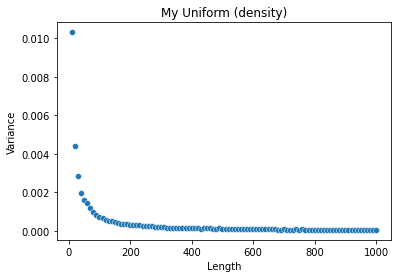

In [19]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = gen_uniform(a, b, l)

        entr = entropy(get_frequencies(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Uniform (density)')
plt.show()

C:\Users\aowl2\AppData\Local\Temp/ipykernel_31608/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


[0.01199649]
[0.01199649 0.01299854]
[0.01199649 0.01299854 0.01135915]
[0.01199649 0.01299854 0.01135915 0.01042415]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955 ]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 

[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274 0.00635918]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.009

[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274 0.00635918 0.00614287 0.00627417
 0.0061106  0.00609125 0.00582791 0.00574723 0.00588473 0.00565648
 0.00592487 0.00599023 0.00563816 0.00598792 0.00544664 0.00541156
 0.00550421]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.005

[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274 0.00635918 0.00614287 0.00627417
 0.0061106  0.00609125 0.00582791 0.00574723 0.00588473 0.00565648
 0.00592487 0.00599023 0.00563816 0.00598792 0.00544664 0.00541156
 0.00550421 0.0053264  0.00540956 0.00531113 0.00546544 0.00585201
 0.00573215 0.00557993 0.00575197 0.00548918 0.00522143 0.00528711
 0.0054719  0.00560072]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.007

[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274 0.00635918 0.00614287 0.00627417
 0.0061106  0.00609125 0.00582791 0.00574723 0.00588473 0.00565648
 0.00592487 0.00599023 0.00563816 0.00598792 0.00544664 0.00541156
 0.00550421 0.0053264  0.00540956 0.00531113 0.00546544 0.00585201
 0.00573215 0.00557993 0.00575197 0.00548918 0.00522143 0.00528711
 0.0054719  0.00560072 0.00536347 0.00545209 0.00491705 0.00517206
 0.00514417 0.00511859 0.00545133 0.00541188 0.00484351 0.00537684
 0.00478966]
[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.009

[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274 0.00635918 0.00614287 0.00627417
 0.0061106  0.00609125 0.00582791 0.00574723 0.00588473 0.00565648
 0.00592487 0.00599023 0.00563816 0.00598792 0.00544664 0.00541156
 0.00550421 0.0053264  0.00540956 0.00531113 0.00546544 0.00585201
 0.00573215 0.00557993 0.00575197 0.00548918 0.00522143 0.00528711
 0.0054719  0.00560072 0.00536347 0.00545209 0.00491705 0.00517206
 0.00514417 0.00511859 0.00545133 0.00541188 0.00484351 0.00537684
 0.00478966 0.00519554 0.00505186 0.00495501 0.00534648 0.00515808
 0.00543477 0.00505355 0.00531761 0.00521322]
[0.01199649 0.012

[0.01199649 0.01299854 0.01135915 0.01042415 0.00995162 0.00907666
 0.00869347 0.00870346 0.0089955  0.00829885 0.00905955 0.00849642
 0.00791154 0.0084957  0.00748338 0.00773866 0.00804044 0.00698082
 0.00743389 0.00783376 0.00748876 0.00726568 0.0066644  0.00681475
 0.00693412 0.00663014 0.00717821 0.007012   0.00676693 0.00630779
 0.00636252 0.00658599 0.00654684 0.00568519 0.00596722 0.0061894
 0.00661619 0.00634923 0.00609274 0.00635918 0.00614287 0.00627417
 0.0061106  0.00609125 0.00582791 0.00574723 0.00588473 0.00565648
 0.00592487 0.00599023 0.00563816 0.00598792 0.00544664 0.00541156
 0.00550421 0.0053264  0.00540956 0.00531113 0.00546544 0.00585201
 0.00573215 0.00557993 0.00575197 0.00548918 0.00522143 0.00528711
 0.0054719  0.00560072 0.00536347 0.00545209 0.00491705 0.00517206
 0.00514417 0.00511859 0.00545133 0.00541188 0.00484351 0.00537684
 0.00478966 0.00519554 0.00505186 0.00495501 0.00534648 0.00515808
 0.00543477 0.00505355 0.00531761 0.00521322 0.00502171 0.00535

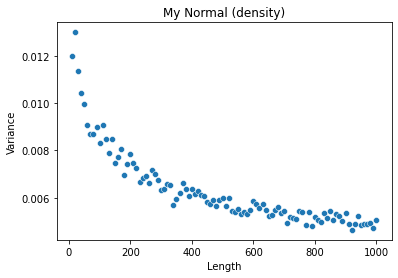

In [20]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = gen_normal(mu, sigma, l)
        entr = entropy(get_frequencies(norm_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Normal (density)')
plt.show()

In [21]:
@jit
def gen_uniform(a, b, size):
    return (b - a) * np.random.random_sample(size=size) + a

                                                            
def gen_normal(mu, sigma, size):
    source = np.random.random_sample(size=size)
    U1 = source[0:len(source)//2]
    U2 = source[len(source)//2:len(source)]
    logU1 = np.log(U1)
    logU1 = np.where(logU1==np.NINF, 0, logU1)
    Z0 = np.sqrt(-2*logU1)*np.cos(2*math.pi*U2)
    Z1 = np.sqrt(-2*logU1)*np.sin(2*math.pi*U2)
    Z = np.concatenate((Z0, Z1))
    Z = Z*sigma + mu
    return Z

C:\Users\aowl2\AppData\Local\Temp/ipykernel_31608/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


[0.00994401]
[0.00994401 0.00496987]
[0.00994401 0.00496987 0.00280827]
[0.00994401 0.00496987 0.00280827 0.00205553]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805 0.00060756]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805 0.00060756 0.00062665]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805 

[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805 0.00060756 0.00062665
 0.00051647 0.00047128 0.00041867 0.00036886 0.00037256 0.00032066
 0.00038542 0.00031772 0.000321   0.0002766  0.00027753 0.0002561
 0.00025476 0.00023741 0.00020793 0.00022203 0.00020207 0.00019228
 0.00018991 0.00017677 0.00016158 0.00015927 0.00015097 0.00017163
 0.00015074 0.00015033 0.00014465]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805 0.00060756 0.00062665
 0.00051647 0.00047128 0.00041867 0.00036886 0.00037256 0.00032066
 0.00038542 0.00031772 0.000321   0.0002766  0.00027753 0.0002561
 0.00025476 0.00023741 0.00020793 0.00022203 0.00020207 0.00019228
 0.00018991 0.00017677 0.00016158 0.00015927 0.00015097 0.00017163
 0.00015074 0.00015033 0.00014465 0.00012885]
[0.00994401 0.00496987 0.00280827 0.00205553 0.00151729 0.00122286
 0.00109017 0.00086739 0.00085473 0.00075805 0.000

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05]
[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05 9.42136211e-05
 9.44173235e-05 9.18423008e-05 8.76797356e-05 8.30478079e-05
 8.16614770e-05 7.77378896e-05 7.47246872e-05 8.14507976e-05
 7.78052475e-05]
[9.9440

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05 9.42136211e-05
 9.44173235e-05 9.18423008e-05 8.76797356e-05 8.30478079e-05
 8.16614770e-05 7.77378896e-05 7.47246872e-05 8.14507976e-05
 7.78052475e-05 7.915698

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05 9.42136211e-05
 9.44173235e-05 9.18423008e-05 8.76797356e-05 8.30478079e-05
 8.16614770e-05 7.77378896e-05 7.47246872e-05 8.14507976e-05
 7.78052475e-05 7.915698

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05 9.42136211e-05
 9.44173235e-05 9.18423008e-05 8.76797356e-05 8.30478079e-05
 8.16614770e-05 7.77378896e-05 7.47246872e-05 8.14507976e-05
 7.78052475e-05 7.915698

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05 9.42136211e-05
 9.44173235e-05 9.18423008e-05 8.76797356e-05 8.30478079e-05
 8.16614770e-05 7.77378896e-05 7.47246872e-05 8.14507976e-05
 7.78052475e-05 7.915698

[9.94400820e-03 4.96987270e-03 2.80827045e-03 2.05553311e-03
 1.51728847e-03 1.22286067e-03 1.09016997e-03 8.67388946e-04
 8.54728627e-04 7.58045644e-04 6.07559793e-04 6.26649614e-04
 5.16465934e-04 4.71281433e-04 4.18670768e-04 3.68863523e-04
 3.72560688e-04 3.20657464e-04 3.85417856e-04 3.17715265e-04
 3.20999739e-04 2.76601682e-04 2.77533630e-04 2.56097944e-04
 2.54760984e-04 2.37407021e-04 2.07932948e-04 2.22034142e-04
 2.02072600e-04 1.92276073e-04 1.89914331e-04 1.76771444e-04
 1.61578381e-04 1.59268014e-04 1.50971610e-04 1.71633341e-04
 1.50741573e-04 1.50325083e-04 1.44649351e-04 1.28852345e-04
 1.30676694e-04 1.30858833e-04 1.39942667e-04 1.23732790e-04
 1.40588640e-04 1.28708891e-04 1.12520525e-04 1.17820247e-04
 1.12959179e-04 1.07893021e-04 1.07195231e-04 9.80125781e-05
 1.02009228e-04 9.02704011e-05 8.76719237e-05 9.42136211e-05
 9.44173235e-05 9.18423008e-05 8.76797356e-05 8.30478079e-05
 8.16614770e-05 7.77378896e-05 7.47246872e-05 8.14507976e-05
 7.78052475e-05 7.915698

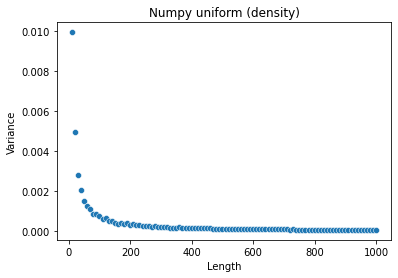

In [22]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = np.random.uniform(a, b, l)
        entr = entropy(get_frequencies(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy uniform (density)')
plt.show()

C:\Users\aowl2\AppData\Local\Temp/ipykernel_31608/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


[0.01323918]
[0.01323918 0.01140974]
[0.01323918 0.01140974 0.01095672]
[0.01323918 0.01140974 0.01095672 0.01059927]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586 ]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 

[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078 0.00624675]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586

[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078 0.00624675 0.0061495  0.00578994
 0.00615916 0.00660512 0.00614334 0.0053512  0.00580714 0.00624506
 0.00597595 0.00582153 0.00630752 0.00609283 0.00580448 0.00600644
 0.00599582]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939

[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078 0.00624675 0.0061495  0.00578994
 0.00615916 0.00660512 0.00614334 0.0053512  0.00580714 0.00624506
 0.00597595 0.00582153 0.00630752 0.00609283 0.00580448 0.00600644
 0.00599582 0.00565263 0.0055742  0.00621128 0.00558611 0.00602594
 0.00524565 0.00545919 0.00505058 0.00555777 0.00539055 0.00582494
 0.00536758 0.00529142]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.006869

[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078 0.00624675 0.0061495  0.00578994
 0.00615916 0.00660512 0.00614334 0.0053512  0.00580714 0.00624506
 0.00597595 0.00582153 0.00630752 0.00609283 0.00580448 0.00600644
 0.00599582 0.00565263 0.0055742  0.00621128 0.00558611 0.00602594
 0.00524565 0.00545919 0.00505058 0.00555777 0.00539055 0.00582494
 0.00536758 0.00529142 0.00502224 0.0048075  0.00526134 0.00553126
 0.00507169 0.00527957 0.00480335 0.00496791 0.00494456 0.00495537
 0.00514483]
[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.00865

[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078 0.00624675 0.0061495  0.00578994
 0.00615916 0.00660512 0.00614334 0.0053512  0.00580714 0.00624506
 0.00597595 0.00582153 0.00630752 0.00609283 0.00580448 0.00600644
 0.00599582 0.00565263 0.0055742  0.00621128 0.00558611 0.00602594
 0.00524565 0.00545919 0.00505058 0.00555777 0.00539055 0.00582494
 0.00536758 0.00529142 0.00502224 0.0048075  0.00526134 0.00553126
 0.00507169 0.00527957 0.00480335 0.00496791 0.00494456 0.00495537
 0.00514483 0.00514846 0.00473628 0.00499625 0.0047154  0.00490929
 0.00523269 0.00507016 0.00527258 0.00479242]
[0.01323918 0.01140

[0.01323918 0.01140974 0.01095672 0.01059927 0.01078983 0.00949798
 0.00893011 0.00992238 0.00910617 0.00868007 0.0086586  0.00825012
 0.00840658 0.00821602 0.00811097 0.00743149 0.00742239 0.0079538
 0.00715749 0.00680975 0.00692528 0.0068698  0.006692   0.006824
 0.00711542 0.00690769 0.00721022 0.00679708 0.00625553 0.00669903
 0.00696216 0.00660928 0.00656065 0.00635024 0.00597939 0.00628809
 0.00582924 0.00610626 0.00607078 0.00624675 0.0061495  0.00578994
 0.00615916 0.00660512 0.00614334 0.0053512  0.00580714 0.00624506
 0.00597595 0.00582153 0.00630752 0.00609283 0.00580448 0.00600644
 0.00599582 0.00565263 0.0055742  0.00621128 0.00558611 0.00602594
 0.00524565 0.00545919 0.00505058 0.00555777 0.00539055 0.00582494
 0.00536758 0.00529142 0.00502224 0.0048075  0.00526134 0.00553126
 0.00507169 0.00527957 0.00480335 0.00496791 0.00494456 0.00495537
 0.00514483 0.00514846 0.00473628 0.00499625 0.0047154  0.00490929
 0.00523269 0.00507016 0.00527258 0.00479242 0.0048324  0.0050069

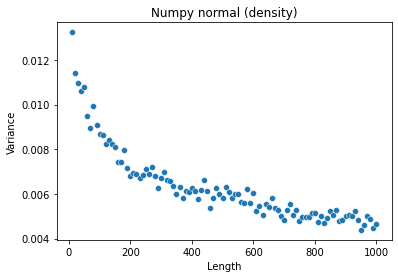

In [23]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = np.random.normal(mu, sigma, l)
        entr = entropy(get_frequencies(norm_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy normal (density)')
plt.show()

[0.02369927]
[0.02369927 0.0053427 ]
[0.02369927 0.0053427  0.00212699]
[0.02369927 0.0053427  0.00212699 0.00128842]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508 0.00031863]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508 0.00031863 0.00024504]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508 0.00031863 0.00024504 0.00022945]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508 0.00031863 0.00024504 0.00022945 0.000162  ]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508 0.00031863 0.00024504 0.00022945 0.000162   0.00015694]
[0.02369927 0.0053427  0.00212699 0.00128842 0.00089678 0.00057712
 0.00043508 0.00031863 0.00024504 0.00022945 

[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05]
[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475

[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05
 1.51476027e-05 1.39888410e-05 1.28061198e-05 1.22955035e-05
 1.19326806e-05 1.14380219e-05 1.13544660e-05 1.04808657e-05
 1.11995800e-05 9.32800745e-06 7.23996223e-06 9.54942272e-06
 9.05598017e-06]
[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.9266

[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05
 1.51476027e-05 1.39888410e-05 1.28061198e-05 1.22955035e-05
 1.19326806e-05 1.14380219e-05 1.13544660e-05 1.04808657e-05
 1.11995800e-05 9.32800745e-06 7.23996223e-06 9.54942272e-06
 9.05598017e-06 7.46981486e-06 7.75454808e-06 7.42146398e-06
 7.16459609e-06 6.58948345e-06 7.63176117e-06 5.82782445e-06
 5.87656018e-06 5.61368917e-06 5.74804340e-06 5.53313644e-06
 5.24252077e-06]
[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.9677

[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05
 1.51476027e-05 1.39888410e-05 1.28061198e-05 1.22955035e-05
 1.19326806e-05 1.14380219e-05 1.13544660e-05 1.04808657e-05
 1.11995800e-05 9.32800745e-06 7.23996223e-06 9.54942272e-06
 9.05598017e-06 7.46981486e-06 7.75454808e-06 7.42146398e-06
 7.16459609e-06 6.58948345e-06 7.63176117e-06 5.82782445e-06
 5.87656018e-06 5.61368917e-06 5.74804340e-06 5.53313644e-06
 5.24252077e-06 5.43333595e-06 5.06398288e-06 4.83416824e-06
 4.95666380e-06 5.002000

[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05
 1.51476027e-05 1.39888410e-05 1.28061198e-05 1.22955035e-05
 1.19326806e-05 1.14380219e-05 1.13544660e-05 1.04808657e-05
 1.11995800e-05 9.32800745e-06 7.23996223e-06 9.54942272e-06
 9.05598017e-06 7.46981486e-06 7.75454808e-06 7.42146398e-06
 7.16459609e-06 6.58948345e-06 7.63176117e-06 5.82782445e-06
 5.87656018e-06 5.61368917e-06 5.74804340e-06 5.53313644e-06
 5.24252077e-06 5.43333595e-06 5.06398288e-06 4.83416824e-06
 4.95666380e-06 5.002000

[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05
 1.51476027e-05 1.39888410e-05 1.28061198e-05 1.22955035e-05
 1.19326806e-05 1.14380219e-05 1.13544660e-05 1.04808657e-05
 1.11995800e-05 9.32800745e-06 7.23996223e-06 9.54942272e-06
 9.05598017e-06 7.46981486e-06 7.75454808e-06 7.42146398e-06
 7.16459609e-06 6.58948345e-06 7.63176117e-06 5.82782445e-06
 5.87656018e-06 5.61368917e-06 5.74804340e-06 5.53313644e-06
 5.24252077e-06 5.43333595e-06 5.06398288e-06 4.83416824e-06
 4.95666380e-06 5.002000

 2.62465466e-06 2.21798420e-06]
[2.36992720e-02 5.34270305e-03 2.12699384e-03 1.28842240e-03
 8.96775272e-04 5.77116603e-04 4.35082133e-04 3.18631314e-04
 2.45044084e-04 2.29447820e-04 1.62001605e-04 1.56939815e-04
 1.20202522e-04 1.10427914e-04 9.89182059e-05 8.67737085e-05
 7.92666560e-05 6.56869923e-05 5.84804876e-05 5.97039276e-05
 4.62028277e-05 4.15287339e-05 4.28785230e-05 3.06203522e-05
 3.24340012e-05 3.02439056e-05 2.98305477e-05 2.35086301e-05
 2.51299248e-05 2.13475203e-05 2.41143020e-05 2.20358695e-05
 1.71743892e-05 1.98382213e-05 1.67262062e-05 1.77101558e-05
 1.51476027e-05 1.39888410e-05 1.28061198e-05 1.22955035e-05
 1.19326806e-05 1.14380219e-05 1.13544660e-05 1.04808657e-05
 1.11995800e-05 9.32800745e-06 7.23996223e-06 9.54942272e-06
 9.05598017e-06 7.46981486e-06 7.75454808e-06 7.42146398e-06
 7.16459609e-06 6.58948345e-06 7.63176117e-06 5.82782445e-06
 5.87656018e-06 5.61368917e-06 5.74804340e-06 5.53313644e-06
 5.24252077e-06 5.43333595e-06 5.06398288e-06 4.83416

 2.55286585e-06 2.37463312e-06 1.92903827e-06 2.15630128e-06]


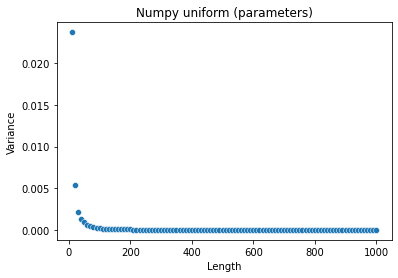

In [24]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = np.random.uniform(a, b, l)
        entr = np.log(np.amax(uni_sample) - np.amin(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy uniform (parameters)')
plt.show()

[0.02481129]
[0.02481129 0.0112278 ]
[0.02481129 0.0112278  0.00746597]
[0.02481129 0.0112278  0.00746597 0.00532104]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 

[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808 0.00044417]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.0

[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808 0.00044417 0.00044853
 0.00039962 0.00038985 0.0004088  0.00039523 0.00035349 0.00039481
 0.00041182 0.00038445 0.00031478 0.00035018 0.00031049 0.00036576
 0.00030139 0.00033535 0.00033606]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00

[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808 0.00044417 0.00044853
 0.00039962 0.00038985 0.0004088  0.00039523 0.00035349 0.00039481
 0.00041182 0.00038445 0.00031478 0.00035018 0.00031049 0.00036576
 0.00030139 0.00033535 0.00033606 0.00031368 0.00029696 0.00031199
 0.00030923 0.00030252 0.00029361 0.00030062 0.00029288 0.00027675
 0.00026297 0.00024372 0.00027246]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.00

 0.00024542 0.00024805 0.00024375 0.00023588 0.00022989 0.00022135]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808 0.00044417 0.00044853
 0.00039962 0.00038985 0.0004088  0.00039523 0.00035349 0.00039481
 0.00041182 0.00038445 0.00031478 0.00035018 0.00031049 0.00036576
 0.00030139 0.00033535 0.00033606 0.00031368 0.00029696 0.00031199
 0.00030923 0.00030252 0.00029361 0.00030062 0.00029288 0.00027675
 0.00026297 0.00024372 0.00027246 0.00025376 0.00024767 0.0002608
 0.00024542 0.00024805 0.00024375 0.00023588 0.00022989 0.00022135
 0.00022866]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00

 0.00021735 0.00021363 0.00019323]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808 0.00044417 0.00044853
 0.00039962 0.00038985 0.0004088  0.00039523 0.00035349 0.00039481
 0.00041182 0.00038445 0.00031478 0.00035018 0.00031049 0.00036576
 0.00030139 0.00033535 0.00033606 0.00031368 0.00029696 0.00031199
 0.00030923 0.00030252 0.00029361 0.00030062 0.00029288 0.00027675
 0.00026297 0.00024372 0.00027246 0.00025376 0.00024767 0.0002608
 0.00024542 0.00024805 0.00024375 0.00023588 0.00022989 0.00022135
 0.00022866 0.00022652 0.00022475 0.0002136  0.00020131 0.0002331
 0.00021735 0.00021363 0.0001

 0.00019814 0.00019586 0.00020821 0.00017481 0.00019025]
[0.02481129 0.0112278  0.00746597 0.00532104 0.00349836 0.00327518
 0.00258883 0.00249182 0.00208887 0.00183329 0.00172812 0.00167847
 0.00134988 0.00139124 0.00144395 0.00116604 0.00110792 0.00108034
 0.00088524 0.00087001 0.0008924  0.00089178 0.00082898 0.00073592
 0.00077071 0.00069585 0.00075087 0.00063329 0.00067133 0.00063487
 0.00058356 0.00054585 0.00056904 0.00055117 0.00049087 0.00053921
 0.00048821 0.00053764 0.00050044 0.00050808 0.00044417 0.00044853
 0.00039962 0.00038985 0.0004088  0.00039523 0.00035349 0.00039481
 0.00041182 0.00038445 0.00031478 0.00035018 0.00031049 0.00036576
 0.00030139 0.00033535 0.00033606 0.00031368 0.00029696 0.00031199
 0.00030923 0.00030252 0.00029361 0.00030062 0.00029288 0.00027675
 0.00026297 0.00024372 0.00027246 0.00025376 0.00024767 0.0002608
 0.00024542 0.00024805 0.00024375 0.00023588 0.00022989 0.00022135
 0.00022866 0.00022652 0.00022475 0.0002136  0.00020131 0.0002331
 0.0002

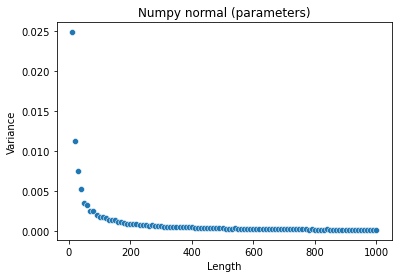

In [25]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = np.random.normal(mu, sigma, l)
        s = np.std(norm_sample, ddof=1)
        entr = (1/2)*np.log(2*math.pi*(s**2)) + 1/2
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy normal (parameters)')
plt.show()

[0.02546704]
[0.02546704 0.00568806]
[0.02546704 0.00568806 0.00232163]
[0.02546704 0.00568806 0.00232163 0.00132131]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806 0.00029157]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806 0.00029157 0.00022255]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806 0.00029157 0.00022255 0.00019587]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806 0.00029157 0.00022255 0.00019587 0.00014433]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806 0.00029157 0.00022255 0.00019587 0.00014433 0.00013805]
[0.02546704 0.00568806 0.00232163 0.00132131 0.00078116 0.00061539
 0.00039806 0.00029157 0.00022255 0.00019587 

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05]
[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.5473

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06]
[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06 7.32097098e-06
 7.31972237e-06 7.57311665e-06 7.01223399e-06 5.69081580e-06
 6.39746205e-06 5.40946659e-06 5.58765016e-06 6.06009917e-06
 5.02226381e-06]
[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.8115

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06 7.32097098e-06
 7.31972237e-06 7.57311665e-06 7.01223399e-06 5.69081580e-06
 6.39746205e-06 5.40946659e-06 5.58765016e-06 6.06009917e-06
 5.02226381e-06 5.46684901e-06 5.57272014e-06 4.70203178e-06
 5.17598715e-06 4.731924

 3.27523801e-06 3.36234611e-06]
[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06 7.32097098e-06
 7.31972237e-06 7.57311665e-06 7.01223399e-06 5.69081580e-06
 6.39746205e-06 5.40946659e-06 5.58765016e-06 6.06009917e-06
 5.02226381e-06 5.46684901e-06 5.57272014e-06 4.70203

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06 7.32097098e-06
 7.31972237e-06 7.57311665e-06 7.01223399e-06 5.69081580e-06
 6.39746205e-06 5.40946659e-06 5.58765016e-06 6.06009917e-06
 5.02226381e-06 5.46684901e-06 5.57272014e-06 4.70203178e-06
 5.17598715e-06 4.731924

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06 7.32097098e-06
 7.31972237e-06 7.57311665e-06 7.01223399e-06 5.69081580e-06
 6.39746205e-06 5.40946659e-06 5.58765016e-06 6.06009917e-06
 5.02226381e-06 5.46684901e-06 5.57272014e-06 4.70203178e-06
 5.17598715e-06 4.731924

[2.54670382e-02 5.68806116e-03 2.32163296e-03 1.32130791e-03
 7.81156694e-04 6.15390218e-04 3.98062630e-04 2.91565718e-04
 2.22548021e-04 1.95872227e-04 1.44325881e-04 1.38049309e-04
 1.25226264e-04 1.03199041e-04 9.48960549e-05 7.90216699e-05
 7.07511495e-05 5.86466129e-05 5.22180748e-05 4.76357139e-05
 4.45598987e-05 4.37441931e-05 3.61319172e-05 3.58867487e-05
 3.09364981e-05 2.84414122e-05 2.84455481e-05 2.54899093e-05
 2.54735267e-05 2.07297121e-05 1.87550064e-05 2.02350886e-05
 1.94038854e-05 1.74849253e-05 1.56853790e-05 1.39628336e-05
 1.40983792e-05 1.39500216e-05 1.15926834e-05 1.36021364e-05
 1.18257697e-05 1.12879960e-05 1.14227171e-05 9.88627948e-06
 1.01554075e-05 9.09710643e-06 9.55836481e-06 9.56662110e-06
 9.60162012e-06 8.01067664e-06 7.39452202e-06 7.32097098e-06
 7.31972237e-06 7.57311665e-06 7.01223399e-06 5.69081580e-06
 6.39746205e-06 5.40946659e-06 5.58765016e-06 6.06009917e-06
 5.02226381e-06 5.46684901e-06 5.57272014e-06 4.70203178e-06
 5.17598715e-06 4.731924

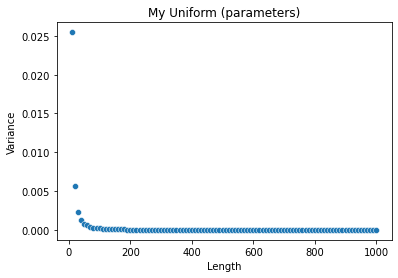

In [26]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = gen_uniform(a, b, l)
        entr = np.log(np.amax(uni_sample) - np.amin(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Uniform (parameters)')
plt.show()

[0.0270644]
[0.0270644  0.01128228]
[0.0270644  0.01128228 0.00722298]
[0.0270644  0.01128228 0.00722298 0.00526023]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326 ]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662 ]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.001866

[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661 0.00048067]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018

[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661 0.00048067 0.00041103 0.00044802
 0.0004456  0.00040661 0.00041622 0.00040623 0.00038425 0.00034588
 0.00039272 0.00036529 0.00037471 0.00036318 0.0003555  0.00031456
 0.00033349]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.0005

[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661 0.00048067 0.00041103 0.00044802
 0.0004456  0.00040661 0.00041622 0.00040623 0.00038425 0.00034588
 0.00039272 0.00036529 0.00037471 0.00036318 0.0003555  0.00031456
 0.00033349 0.0003223  0.00031665 0.00031281 0.00032905 0.00029864
 0.00030393 0.00028758 0.00027982 0.00027509 0.00028247 0.00027323
 0.00027727 0.00024332]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008

[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661 0.00048067 0.00041103 0.00044802
 0.0004456  0.00040661 0.00041622 0.00040623 0.00038425 0.00034588
 0.00039272 0.00036529 0.00037471 0.00036318 0.0003555  0.00031456
 0.00033349 0.0003223  0.00031665 0.00031281 0.00032905 0.00029864
 0.00030393 0.00028758 0.00027982 0.00027509 0.00028247 0.00027323
 0.00027727 0.00024332 0.0002832  0.0002817  0.00023024 0.00026421
 0.00024107 0.00025058 0.00023872 0.00025235 0.00022393 0.00023671
 0.00023046]
[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018

[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661 0.00048067 0.00041103 0.00044802
 0.0004456  0.00040661 0.00041622 0.00040623 0.00038425 0.00034588
 0.00039272 0.00036529 0.00037471 0.00036318 0.0003555  0.00031456
 0.00033349 0.0003223  0.00031665 0.00031281 0.00032905 0.00029864
 0.00030393 0.00028758 0.00027982 0.00027509 0.00028247 0.00027323
 0.00027727 0.00024332 0.0002832  0.0002817  0.00023024 0.00026421
 0.00024107 0.00025058 0.00023872 0.00025235 0.00022393 0.00023671
 0.00023046 0.00024314 0.0002059  0.00022509 0.00019797 0.00020986
 0.00020805 0.00020001 0.00019531 0.00021146]
[0.0270644  0.011

[0.0270644  0.01128228 0.00722298 0.00526023 0.00410498 0.0035326
 0.00276388 0.00244472 0.00199447 0.00183794 0.0018662  0.00141735
 0.00150473 0.00132787 0.00119058 0.00120928 0.00110532 0.00101603
 0.00096687 0.00089111 0.00091772 0.0008929  0.0008097  0.00075383
 0.00071779 0.00074826 0.00071632 0.00059834 0.00062719 0.00068862
 0.00060888 0.00055454 0.00054647 0.0005526  0.00052981 0.00047926
 0.00049677 0.00048818 0.00052661 0.00048067 0.00041103 0.00044802
 0.0004456  0.00040661 0.00041622 0.00040623 0.00038425 0.00034588
 0.00039272 0.00036529 0.00037471 0.00036318 0.0003555  0.00031456
 0.00033349 0.0003223  0.00031665 0.00031281 0.00032905 0.00029864
 0.00030393 0.00028758 0.00027982 0.00027509 0.00028247 0.00027323
 0.00027727 0.00024332 0.0002832  0.0002817  0.00023024 0.00026421
 0.00024107 0.00025058 0.00023872 0.00025235 0.00022393 0.00023671
 0.00023046 0.00024314 0.0002059  0.00022509 0.00019797 0.00020986
 0.00020805 0.00020001 0.00019531 0.00021146 0.00020439 0.00021

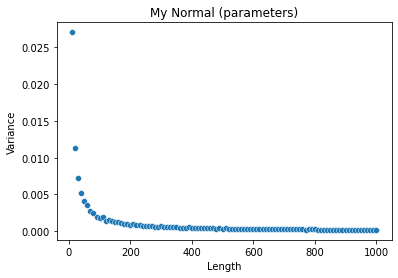

In [27]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = gen_normal(mu, sigma, l)
        s = np.std(norm_sample, ddof=1)
        entr = (1/2)*np.log(2*math.pi*(s**2)) + 1/2
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)
    print(variances)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Normal (parameters)')
plt.show()